## Black Friday Sales Prediction - Regression
---

### Dataset Information
---
This dataset contains sales transactions recorded at a retail store, making it an ideal dataset for practicing and enhancing your feature engineering skills. With its 550,069 rows and 12 columns, this dataset offers a rich opportunity to gain insights into various shopping experiences. This project involves solving a regression problem.

### Import Required Libraries 


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Import dataset 

In [3]:
df_train = pd.read_csv("C:\\Users\\Daman\\Downloads\\Blank friday data set\\train.csv")
df_test = pd.read_csv("C:\\Users\\Daman\\Downloads\\Blank friday data set\\test.csv")

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
### Check for Datatype 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
### Statistical Overview 
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [7]:
#### find null values 
def missing_info(df):    
    x = df_train.isnull().sum()[(df_train.isnull().sum() > 0)]
    d = pd.DataFrame(x, columns=['missing values'])
    d['% of missing values'] = np.round((x/df_train.shape[0]) * 100, decimals=2)
    return d

In [14]:
missing_info(df_train)

,missing values,% of missing values
Product_Category_2,173638,31.57
Product_Category_3,383247,69.67


* Product_category 2 and Product_category_3 Contain **31.57%** and **69.67 %** Null values respectivly

- Lets treat missing values later while preprossing Data for  model creation 

In [9]:
## check for duplication of data
df_train.duplicated().sum()

0

* there is no duplicates entry of data 

### Exploratry Data Analysis 

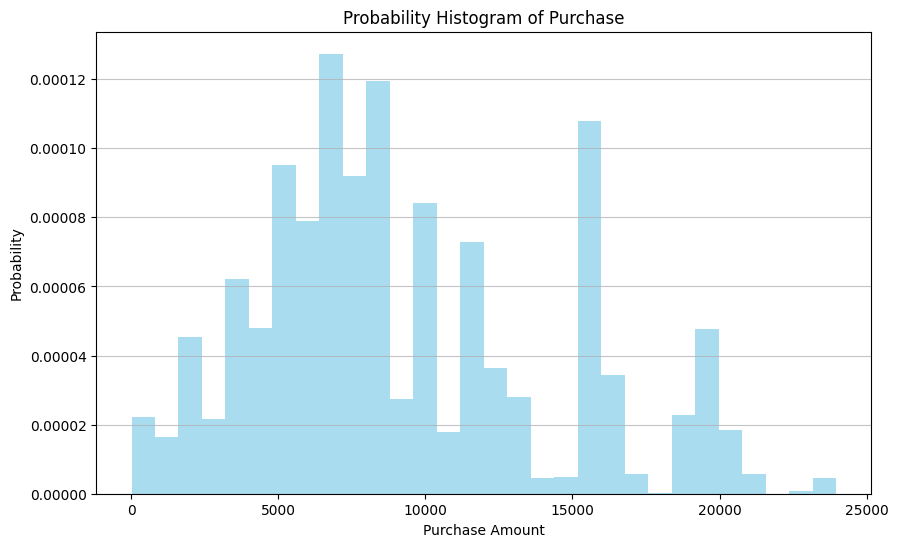

In [10]:
# Assuming df is your DataFrame and 'Purchase' is the column you want to plot
plt.figure(figsize=(10, 6))
plt.hist(df_train['Purchase'], bins=30, density=True, alpha=0.7, color='skyblue')
plt.title('Probability Histogram of Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Probability')
plt.grid(axis='y', alpha=0.75)
plt.show()


* Purchase amount represent all most normal distribution of data
* moderate left skew distribution can be adjust by square Root Transformation method to create symmetric distribution for ML Model  

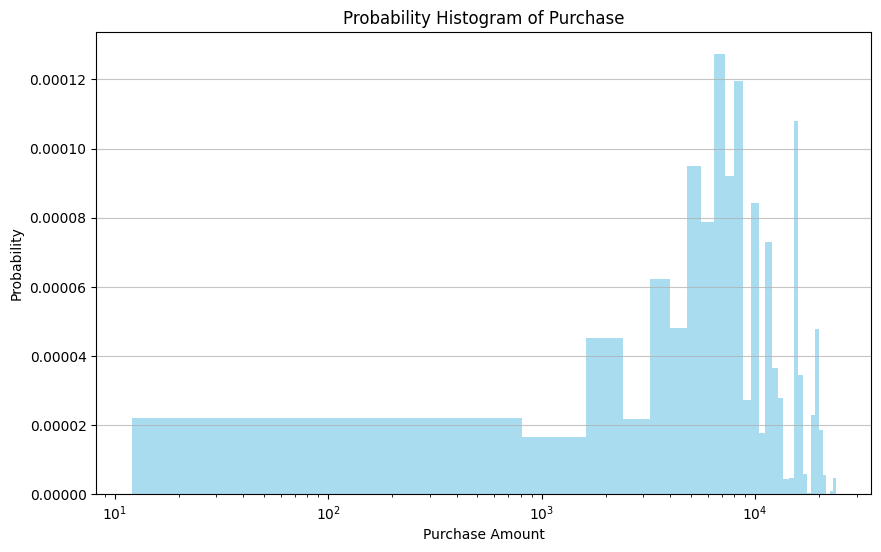

In [11]:
# On log scale 
plt.figure(figsize=(10, 6))
plt.hist(df_train['Purchase'], bins=30, density=True, alpha=0.7, color='skyblue')
plt.xscale('log')
plt.title('Probability Histogram of Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Probability')
plt.grid(axis='y', alpha=0.75)
plt.show()


## Univarient Analysis 

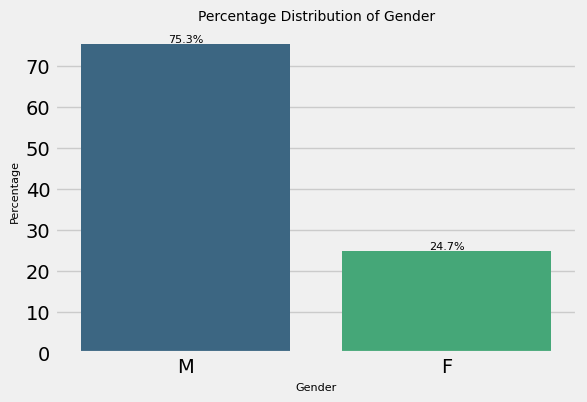

In [12]:
# Calculate percentage of each category
gender_counts = df_train['Gender'].value_counts(normalize=True) * 100

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Add data labels
for i, percentage in enumerate(gender_counts.values):
    ax.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', fontsize=8)

plt.ylabel('Percentage', fontsize=8)
plt.xlabel('Gender', fontsize=8)
plt.title('Percentage Distribution of Gender', fontsize=10)
plt.show()


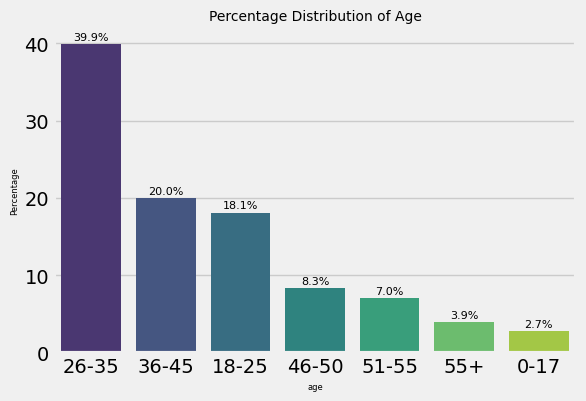

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of each category
gender_counts = df_train['Age'].value_counts(normalize=True) * 100

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Add data labels
for i, percentage in enumerate(gender_counts.values):
    ax.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', fontsize=8)

plt.ylabel('Percentage', fontsize=6)
plt.xlabel('age', fontsize=6)
plt.title('Percentage Distribution of Age', fontsize=10)
plt.show()


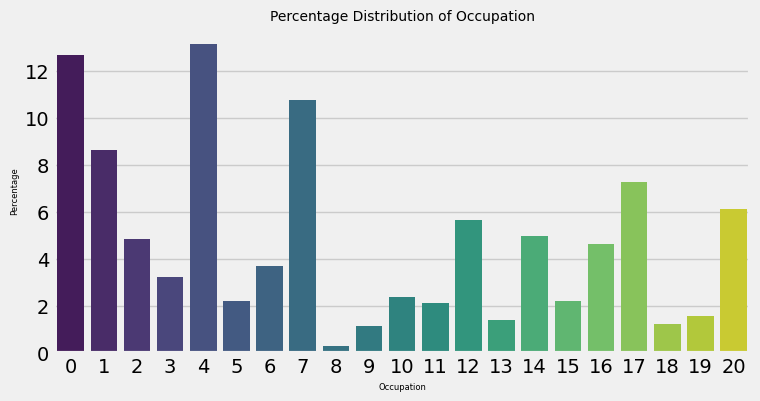

In [40]:
# Calculate percentage of each category
gender_counts = df_train['Occupation'].value_counts(normalize=True) * 100
# Sort the values in ascending order
gender_counts = gender_counts.sort_values()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

plt.ylabel('Percentage', fontsize=6)
plt.xlabel('Occupation', fontsize=6)
plt.title('Percentage Distribution of Occupation', fontsize=10)
plt.show()


*  Occupation categories 0, 4, and 7 account for the majority of purchases during the Black Friday sale.

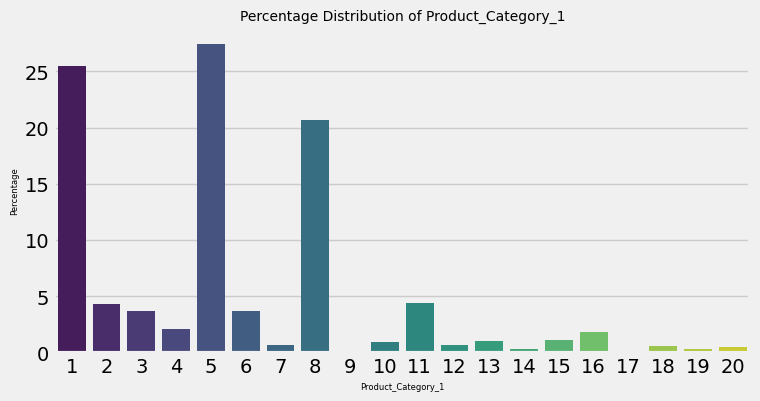

In [39]:
# Calculate percentage of each category
Product_Category_1_counts = df_train['Product_Category_1'].value_counts(normalize=True) * 100

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
ax = sns.barplot(x=Product_Category_1_counts.index, y=Product_Category_1_counts.values, palette='viridis')

plt.ylabel('Percentage', fontsize=6)
plt.xlabel('Product_Category_1', fontsize=6)
plt.title('Percentage Distribution of Product_Category_1', fontsize=10)
plt.show()

* The combined sales from Categories 5, 1, and 8 represent approximately 70% of total sales on Black Friday

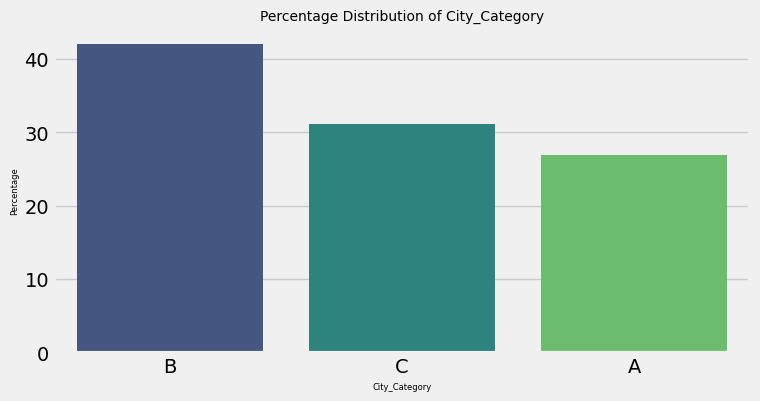

In [38]:
# Calculate percentage of each category
City_Category_counts = df_train['City_Category'].value_counts(normalize=True) * 100

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
ax = sns.barplot(x=City_Category_counts.index, y=City_Category_counts.values, palette='viridis')

plt.ylabel('Percentage', fontsize=6)
plt.xlabel('City_Category', fontsize=6)
plt.title('Percentage Distribution of City_Category', fontsize=10)
plt.show()

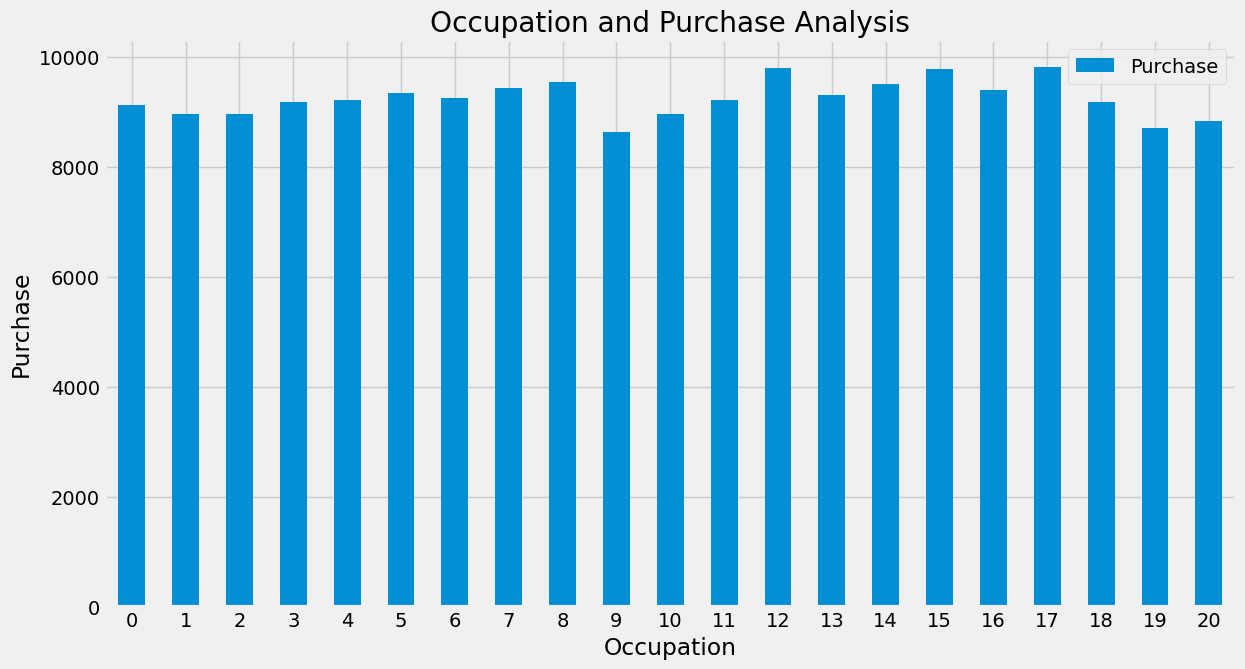

In [43]:
# bivariate analysis
occupation_plot = df_train.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

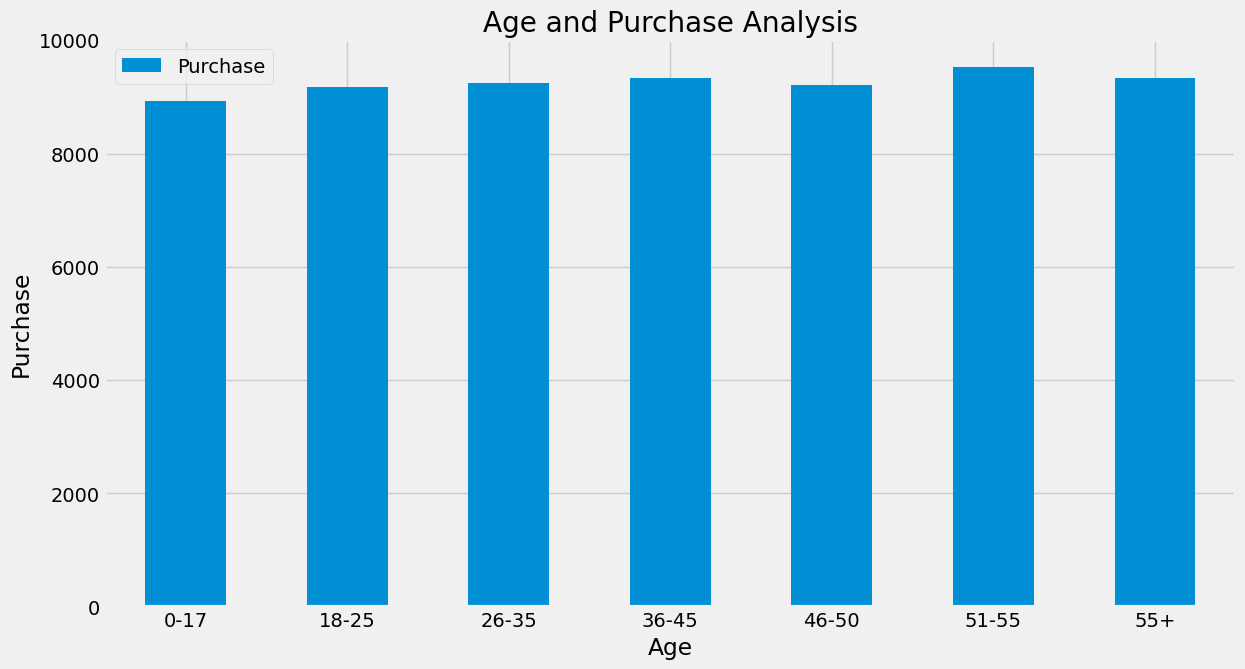

In [47]:
age_plot = df_train.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

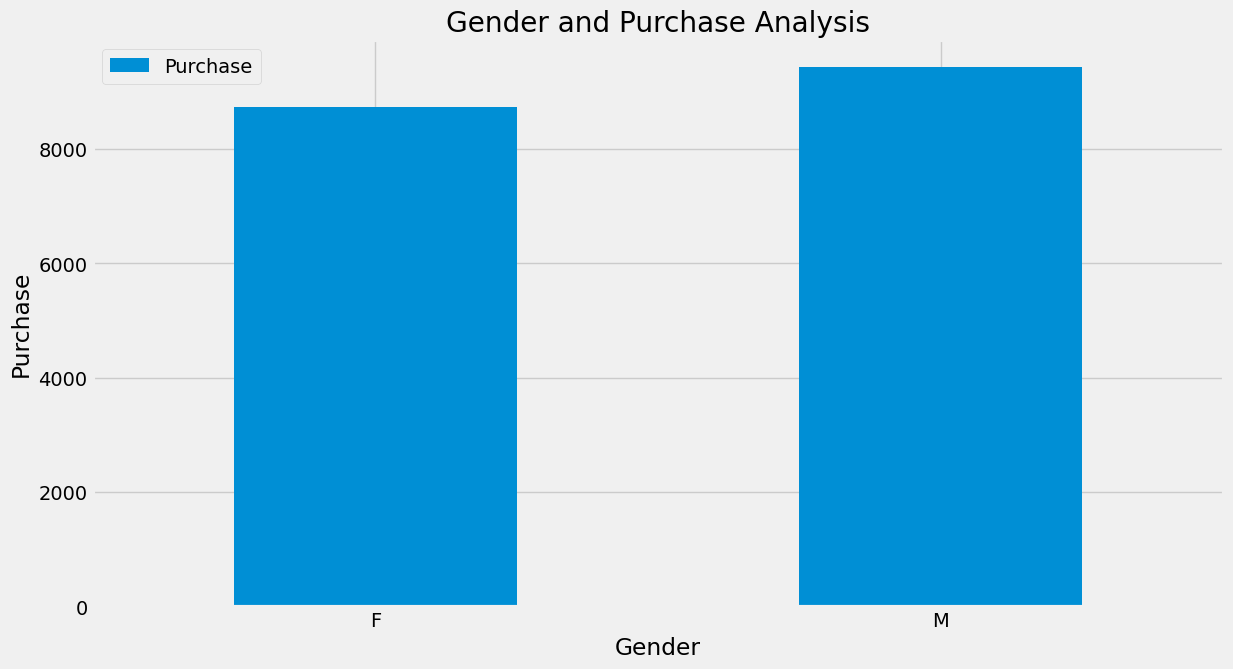

In [48]:
gender_plot = df_train.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Preprocessing the dataset

In [73]:
### Replace null values 
df_train['Product_Category_2'] = df_train['Product_Category_2'].fillna(pd.NA).astype("float32")
df_train['Product_Category_3'] = df_train['Product_Category_3'].fillna(pd.NA).astype("float32")

Replace blank values with NAN Values which is trated null values by ML Model

In [74]:
## Check for null values
df_train.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [75]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years','Gender']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df_train[col] = le.fit_transform(df_train[col])
df_train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [79]:
## drop prduct_ID which cause error in Correlation metrics
df_train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,1,6,16,2,4,0,8,-2.0,-2.0,7969


<Axes: >

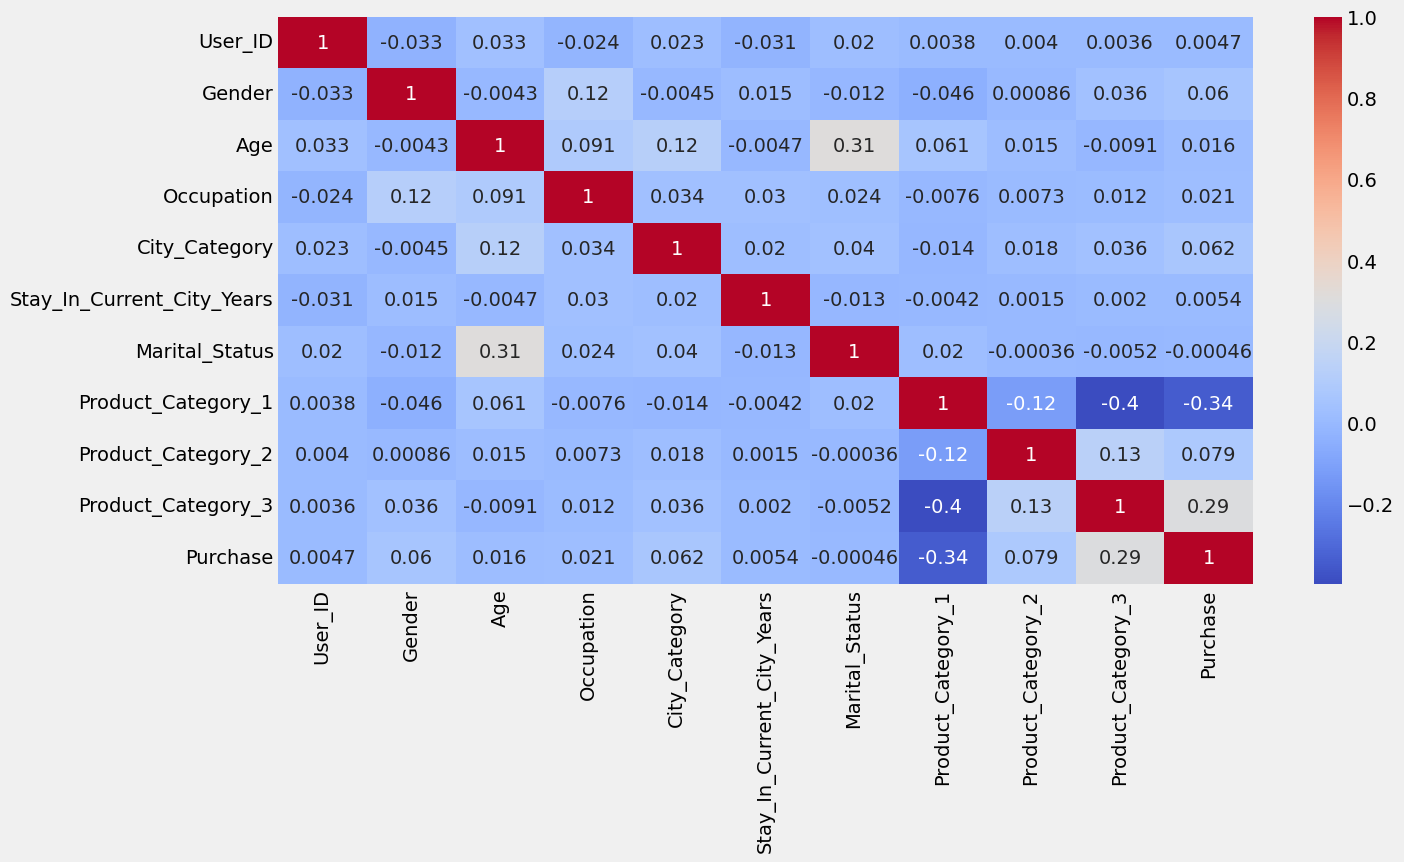

In [77]:
corr = df_train.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

* From the Correlation Matrics we can make result that product category 1 and Purchse columns have nagetive correlation 
* Matrital status and  age has positive correlation 

In [80]:
X = df_train.drop(columns=['User_ID', 'Purchase'])
y = df_train['Purchase']

### Model Training 

In [90]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

# Assuming X is your feature matrix and y is your target variable
# Assuming model is your linear regression model
train(model, X, y)


Results
MSE: 4615.543270660222
CV Score: 4625.252945835687


Overall, these results suggest that the linear regression model performs reasonably well in predicting sales based on the given features.

from sklearn.linear_model import LinearRegression

<Axes: title={'center': 'Model Coefficients'}>

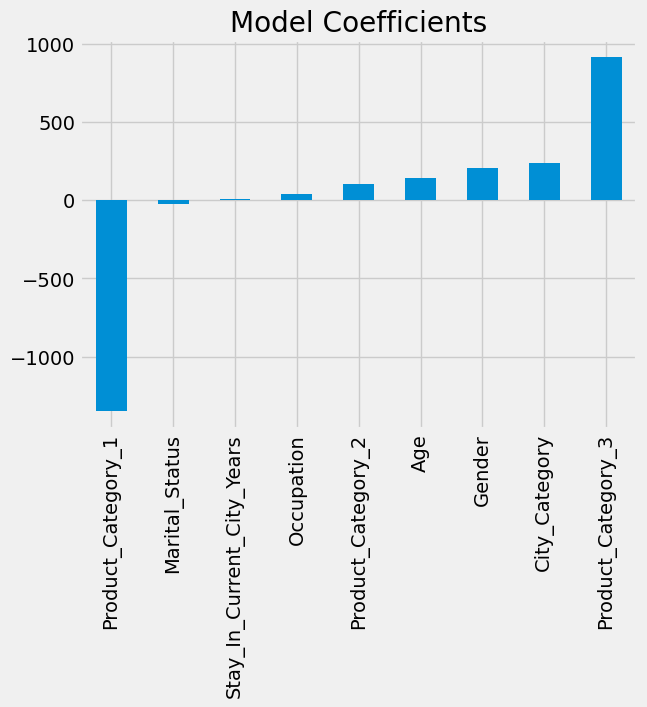

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X is your feature matrix and y is your target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_scaled, y)

# Get the coefficients
coef = pd.Series(model.coef_, index=X.columns).sort_values()

# Plot the coefficients
coef.plot(kind='bar', title='Model Coefficients')


Product Category 1 emerges as the most influential feature driving purchase prediction value, based on the model coefficients.

In [94]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # calculate R-squared
    r_squared = r2_score(y_test, pred)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("R-squared:", r_squared)
    print("Percentage Accuracy:", r_squared * 100)

# Assuming X is your feature matrix and y is your target variable
# Assuming model is your linear regression model
train(model, X, y)


Results
R-squared: 0.15214968092902725
Percentage Accuracy: 15.214968092902726
